# Traveling sales'man problem

## Lab1 
- Rozwiazanie pokolei
- Zachlanne zawsze do najblizszego
- Losowo

Rozplatywanie rozwiazania jesli 4 weirzcholki sie przecinaja to jest to udowodnione ze jest to nieoptymalne i trzeba zamienic kolejnosc

Wizualizacja wierzcholki i polaczenia w formie graficznej

tsp lib / ckroA

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import LinearSegmentedColormap
import random
import math
from utils import *

In [2]:
def calculate_distance_greedy(data):
    current_city_idx = 0
    unvisited = list(range(len(data)))
    unvisited.remove(current_city_idx)
    
    order = [data[current_city_idx]]
    total_distance = 0
    
    while unvisited:
        min_dist = float('inf')
        next_city_idx = -1
        
        for j in unvisited:
            dist = ((data[j][1] - data[current_city_idx][1])**2 + (data[j][2] - data[current_city_idx][2])**2)**0.5
            if dist < min_dist:
                min_dist = dist
                next_city_idx = j
        
        current_city_idx = next_city_idx
        unvisited.remove(current_city_idx)
        order.append(data[current_city_idx])
        total_distance += min_dist
    while True:
        improved_order, improved_distance, _ = dismantle_crossings(order, total_distance)
        if total_distance > improved_distance:
            total_distance = improved_distance
            order = improved_order
        else:
            break
    return total_distance, order
#print(calculate_distance_greedy(load_file("burma14.tsp")))

In [3]:
saTempStart=10000 * 10;    # temperatura Startowa
saTempAlpha=0.976 + 0.01;    # wspólczynnik zmiany temperaturyS
steps = 400
switches = 100

def calculate_distance_annealing(data, saTempStart=10000, saTempAlpha=0.976, steps=400, switches=100):
    current_path = data.copy()
    random.shuffle(current_path)
    best_path = current_path.copy()
    best_distance = calculate_total_distance(best_path)
    
    temperature = saTempStart
    temperatures = []

    for _ in range(steps):
        current_path, best_path, best_distance = sa_step(current_path, best_path, best_distance, temperature, switches)
        temperatures.append(temperature)
        temperature *= saTempAlpha
    
    return best_distance, best_path, temperatures


def sa_step(current_path, best_path, best_distance, temperature, switches):
    current_distance = calculate_total_distance(current_path)

    for _ in range(switches):
        a, b = sorted(random.sample(range(len(current_path)), 2))
        new_path = current_path[:a] + list(reversed(current_path[a:b+1])) + current_path[b+1:]
        new_distance = calculate_total_distance(new_path)

        if new_distance < current_distance:
            current_path = new_path
            current_distance = new_distance
        else:
            prob = math.exp((current_distance - new_distance) / temperature)
            if random.random() < prob:
                current_path = new_path
                current_distance = new_distance

        if new_distance < best_distance:
            best_distance = new_distance
            best_path = new_path

    return current_path, best_path, best_distance
#print(calculate_distance_annealing(load_file("att48.tsp")))

In [4]:
import matplotlib.pyplot as plt
import time
saTempStart=10000;    # temperatura Startowa
saTempAlpha=0.976;    # wspólczynnik zmiany temperatury
steps = 400
switches = 100

configs = [
    {'saTempStart': saTempStart , 'saTempAlpha': saTempAlpha, 'steps': steps, 'switches': switches},
    {'saTempStart': saTempStart + 100, 'saTempAlpha': saTempAlpha, 'steps': steps, 'switches': switches},
    {'saTempStart': saTempStart - 1000, 'saTempAlpha': saTempAlpha, 'steps': steps, 'switches': switches},
    {'saTempStart': saTempStart * 10, 'saTempAlpha': saTempAlpha, 'steps': steps, 'switches': switches},
    {'saTempStart': saTempStart / 10, 'saTempAlpha': saTempAlpha, 'steps': steps, 'switches': switches},
    {'saTempStart': saTempStart , 'saTempAlpha': saTempAlpha + 0.01, 'steps': steps, 'switches': switches},
    {'saTempStart': saTempStart , 'saTempAlpha': saTempAlpha - 0.01, 'steps': steps, 'switches': switches},
    {'saTempStart': saTempStart , 'saTempAlpha': saTempAlpha, 'steps': steps + 100, 'switches': switches},
    {'saTempStart': saTempStart , 'saTempAlpha': saTempAlpha, 'steps': steps - 100, 'switches': switches},
    {'saTempStart': saTempStart , 'saTempAlpha': saTempAlpha, 'steps': steps, 'switches': switches + 50},
    {'saTempStart': saTempStart , 'saTempAlpha': saTempAlpha, 'steps': steps, 'switches': switches - 50},
]

def benchmark_anneling_parameters(data, configs):
    results = []

    for config in configs:
        saTempStart = config['saTempStart']
        saTempAlpha = config['saTempAlpha']
        steps = config['steps']
        switches = config['switches']

        times = []
        distances = []

        for _ in range(10):
            start = time.time()
            distance, _, _ = calculate_distance_annealing(
                data.copy(),
                saTempStart=saTempStart,
                saTempAlpha=saTempAlpha,
                steps=steps,
                switches=switches
            )
            end = time.time() - start

            distances.append(distance)
            times.append(end)

        avg_distance = sum(distances) / len(distances)
        avg_time = sum(times) / len(times)

        results.append({
            'config': config,
            'avg_distance': avg_distance,
            'avg_time': avg_time
        })

    return results

data = load_file("burma14.tsp")
#results = benchmark_anneling_parameters(data, configs)
#plot_benchmark_results(results)

In [5]:
import os
import time

def benchmark_algorithms(directory):
    results = []

    for filename in os.listdir(directory):
        if filename.endswith('.tsp'):
            filepath = os.path.join(directory, filename)
            try:
                data = load_file(filepath)
                print(f"Benchmarking {filename}...")

                # Zachłanny
                start = time.time()
                greedy_dist, _ = calculate_distance_greedy(data.copy())
                greedy_time = time.time() - start

                # Wyżarzanie
                start = time.time()
                anneal_dist, _, _ = calculate_distance_annealing(data.copy())
                anneal_time = time.time() - start

                results.append({
                    "file": filename,
                    "greedy_dist": round(greedy_dist, 2),
                    "greedy_time": round(greedy_time, 3),
                    "anneal_dist": round(anneal_dist, 2),
                    "anneal_time": round(anneal_time, 3)
                })

            except Exception as e:
                print(f"Błąd przy przetwarzaniu {filename}: {e}")

    print("\n--- Wyniki benchmarku ---")
    print(f"{'Plik':<20} {'GreedyDist':<12} {'GreedyTime':<6} {'AnnealDist':<12} {'AnnealTime':<6}")
    for r in results:
        print(f"{r['file']:<20} {r['greedy_dist']:<12} {r['greedy_time']:<6} {r['anneal_dist']:<12} {r['anneal_time']:<6}")

# benchmark_algorithms("../TSP")

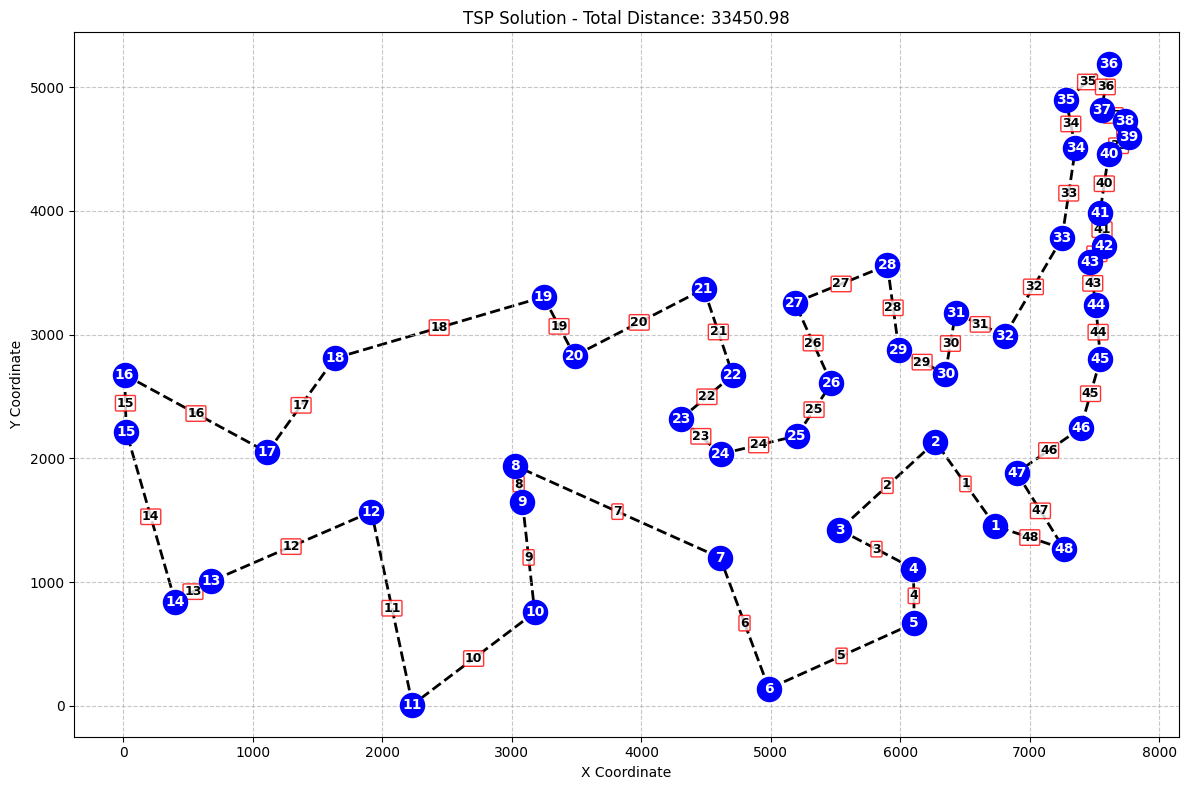

In [6]:
data = load_file("att48.tsp")
best_distance, best_path = calculate_distance_greedy(data)
plot_tsp_solution(best_distance, best_path)

In [7]:
def order_crossover(parent1, parent2):
    size = len(parent1)
    a, b = sorted(random.sample(range(size), 2))

    child = [None] * size
    # Wstawienie fragmentu z parent1
    child[a:b+1] = parent1[a:b+1]

    ptr = (b + 1) % size  # miejsce startowe w parent2
    child_idx = (b + 1) % size  # miejsce startowe w dziecku

    while None in child:
        if parent2[ptr] not in child:
            child[child_idx] = parent2[ptr]
            child_idx = (child_idx + 1) % size
        ptr = (ptr + 1) % size

    return child

def two_opt_mutation(path):
    a, b = sorted(random.sample(range(len(path)), 2))
    return path[:a] + list(reversed(path[a:b+1])) + path[b+1:]

def tournament_selection(population, k=3):
    selected = random.sample(population, k)
    return min(selected, key=lambda x: x[0])

def genetic_algorithm(data, generations=100, pop_size=100, crossover_rate=0.8, mutation_rate=0.2):
    def create_individual():
        individual = data.copy()
        distance , order = calculate_distance_random(individual)
        return (distance , order)
    
    # Inicjalizacja
    population = []
    for _ in range(pop_size):
        distance , order = create_individual()
        population.append((distance , order))

    # Ewolucja
    for gen in range(generations):
        new_population = []

        while len(new_population) < pop_size:
            parent1 = tournament_selection(population)[1]
            parent2 = tournament_selection(population)[1]

            # Krzyżowanie
            if random.random() < crossover_rate:
                child = order_crossover(parent1, parent2)
            else:
                child = parent1[:]

            # Mutacja
            if random.random() < mutation_rate:
                child = two_opt_mutation(child)

            # Ocena i ewentualna naprawa
            distance = calculate_total_distance(child)
            child, distance, _ = dismantle_crossings(child, distance)
            new_population.append((distance, child))

        # Selekcja elit
        population = sorted(new_population, key=lambda x: x[0])[:pop_size]
        best_dist = population[0][0]

    final_best = min(population, key=lambda x: x[0])
    print(f"[FINAL] Best overall distance: {final_best[0]}")
    return final_best

In [ ]:
import time

base_config = {'generations': 10, 'pop_size': 100, 'crossover_rate': 0.5, 'mutation_rate': 0.2}

ga_configs = [
    base_config,
    # Zmieniamy tylko generacje
    {**base_config, 'generations': 15},
    {**base_config, 'generations': 25},
    {**base_config, 'generations': 5},

    # Zmieniamy tylko populację
    {**base_config, 'pop_size': 50},
    {**base_config, 'pop_size': 150},
    {**base_config, 'pop_size': 200},

    # Zmieniamy tylko crossover_rate
    {**base_config, 'crossover_rate': 0.6},
    {**base_config, 'crossover_rate': 0.9},
    {**base_config, 'crossover_rate': 1.0},

    {**base_config, 'mutation_rate': 0.5},
    {**base_config, 'mutation_rate': 0.6},
    {**base_config, 'mutation_rate': 0.7},
    {**base_config, 'mutation_rate': 0.8},
    {**base_config, 'mutation_rate': 0.9},
    {**base_config, 'mutation_rate': 1.0},
]


def benchmark_genetic_algorithm(data, configs, runs=5):
    results = []
    for config in configs:
        distances = []
        times = []
        print(f"Benchmarking GA config: {config}")
        for _ in range(runs):
            start_time = time.time()
            best_distance, best_path = genetic_algorithm(
                data.copy(),
                generations=config['generations'],
                pop_size=config['pop_size'],
                crossover_rate=config['crossover_rate'],
                mutation_rate=config['mutation_rate']
            )
            elapsed = time.time() - start_time
            distances.append(best_distance)
            times.append(elapsed)
        
        avg_distance = sum(distances) / runs
        avg_time = sum(times) / runs
        results.append({
            'config': config,
            'avg_distance': avg_distance,
            'avg_time': avg_time
        })
        print(f"Avg distance: {avg_distance:.2f}, Avg time: {avg_time:.3f} sec\n")
    return results

data = load_file("att48.tsp")
benchmark_genetic_algorithm(data, ga_configs)


[FINAL] Best overall distance: 30.878503892587993


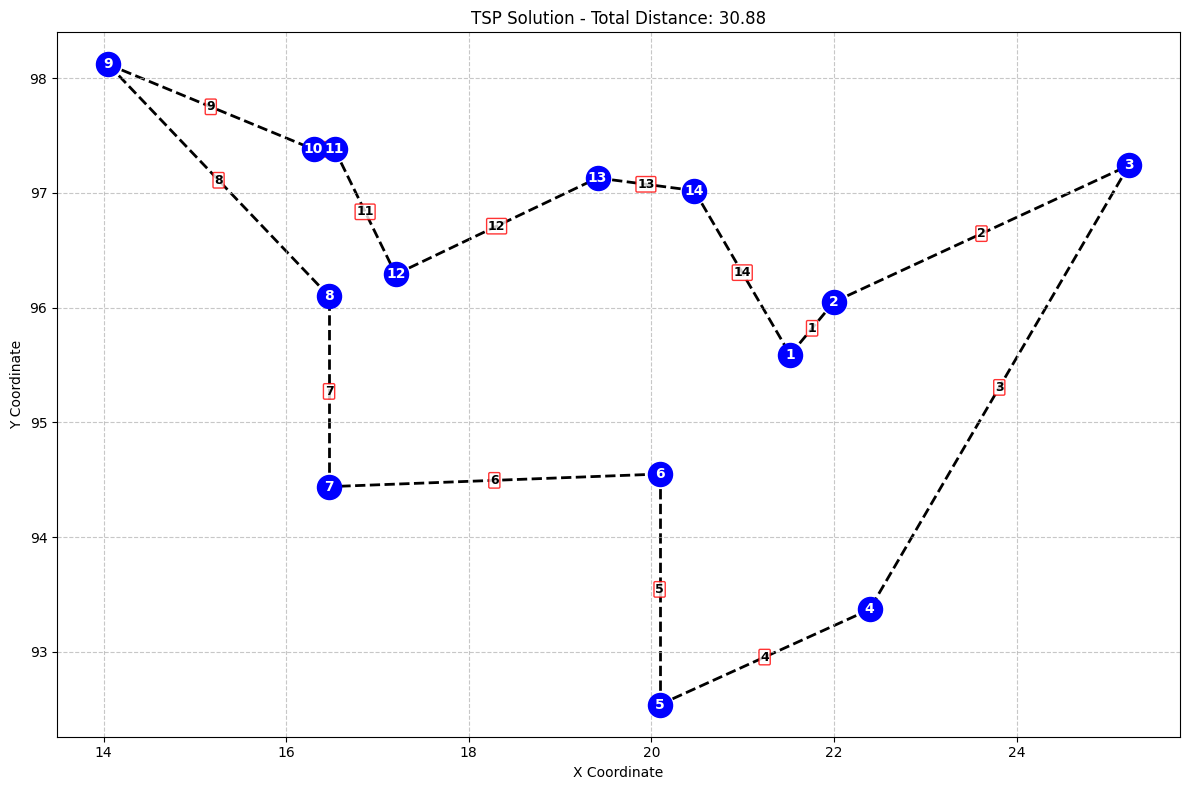

In [9]:
data = load_file("burma14.tsp")
best_distance, best_path = genetic_algorithm(data)
plot_tsp_solution(best_distance, best_path)
#33523